# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Elizabeth Haydon

# What does a Simple Linear Regression Model do?
#### It averages multiple data points into a single line graph


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
diamonds = sns.load_dataset('diamonds')

In [23]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* The r-value measures the type and strength of the linear correlation between two variables.
* 1.0 to -1.0
* 1 indicates a positive correlation
* -1 indicates a negative correlation
* 0 indicates no correlation

In [24]:
diamonds.corr(numeric_only=True).head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

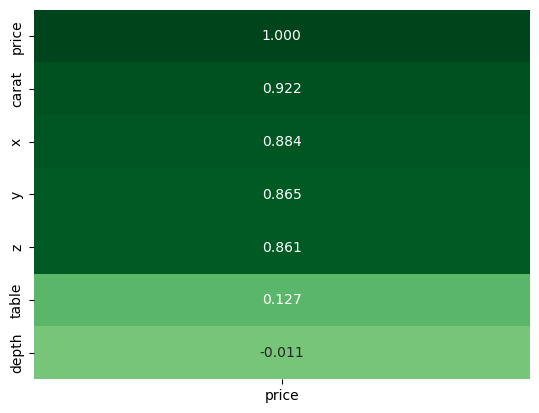

In [36]:
sns.heatmap(data=diamonds.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), cmap='Greens', vmin=-1.0, vmax=1.0,cbar=False,annot=True,fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split dataset into training datset and test dataset
2. Training dataset is used to create the regression model
3. Test dataset is run against said model
4. If the model is valid, you can use it to predict the dependent variable based on the independent variables

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(diamonds[['carat']],diamonds[['price']],test_size=.30,random_state=20)

In [92]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [93]:
model.score(x_test, y_test)

0.8504107786474794

In [95]:
y_predict=model.predict(x_test)
y_predict

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [96]:
predicted=pd.DataFrame(y_predict, columns = ['predicted_price'])
predicted.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [98]:
diamond_predicted=pd.DataFrame(y_predict, columns=['predicted_price'])
diamond_predicted.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [106]:
diamond_combined-diamond_predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
diamond_combined.head(5)

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [119]:
diamond_melt=pd.melt(diamond_combined, id_vars=['carat'],var_name='price_type',value_name='price_value')
diamond_melt

,carat,price_type,price_value
0,1.52,predicted_price,9540.641914
1,0.54,predicted_price,1940.075433
2,0.70,predicted_price,3180.984246
3,0.59,predicted_price,2327.859437
4,0.86,predicted_price,4421.893059
...,...,...,...
32359,0.31,price,914.000000
32360,1.01,price,5932.000000
32361,1.53,price,8971.000000
32362,0.23,price,498.000000


In [120]:
sns.relplot(date=diamond_melt,kind='line',x='carat',y='price_value',hue='price_type')
# I don't know why it isn't using carat as x, I followed what the book did

ValueError: Could not interpret value `carat` for parameter `x`

## Regression line equation is **y = mx + b**, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [123]:
X=data.carat.values.reshape(-1,1)
y=data.price

In [125]:
lr=LinearRegression()
predicted=lr.fit(X,y)

In [129]:
m=predicted.coef_
b=predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454457


In [130]:
print(f'Regression line equation is y= {m}x + ={b}')

Regression line equation is y= [7756.42561797]x + =-2256.3605800454457
